<a href="https://colab.research.google.com/github/anjha1/Data-Science/blob/main/Python/107.%20SMOTE/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMOTE(Synthetic Minority Oversampling Technique)

It is a technique use in ML to address imbalanced datasets where the minority class has Significantly fewer instances then the majority class.


SMOTE innolves generating synthetic instances of the minority class by interpolating between existing instances.

In [34]:
from sklearn.datasets import make_classification

In [35]:
make_classification()

(array([[ 0.8650443 , -0.93163982,  0.2101744 , ..., -0.23097562,
         -0.27338654, -1.92452404],
        [-0.78295381, -0.24027617,  0.35866894, ..., -0.30335507,
          0.1356204 , -0.15819833],
        [ 0.02212335, -1.55232836, -1.20613863, ..., -0.51454403,
          0.72230873, -0.57594313],
        ...,
        [ 0.03623918, -1.12309143, -1.17985589, ..., -0.38165644,
          0.68947012,  1.45538721],
        [-0.27599333,  0.36369388, -1.27174947, ..., -0.73139981,
         -0.3089794 ,  1.82303423],
        [-0.08552222,  1.18965606, -0.97547071, ...,  1.97291177,
          1.20040247, -1.94968987]]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]))

In [36]:
# X independent feature
# y dependent feature
X,y,=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [37]:
X,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [38]:
X.shape,y.shape

((1000, 2), (1000,))

In [39]:
import pandas as pd
df1=pd.DataFrame(X,columns=['feature1','feature2'])
df2=pd.DataFrame(y,columns=['target'])

In [40]:
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [41]:
df1

,feature1,feature2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [42]:
final_df=pd.concat([df1,df2],axis=1)
final_df

,feature1,feature2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [43]:
final_df['target'].value_counts()

,count
target,
0,894
1,106


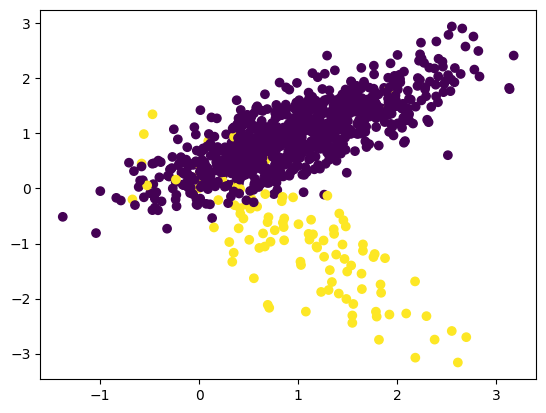

In [44]:
import matplotlib.pyplot as plt
plt.scatter(final_df['feature1'],final_df['feature2'],c=final_df['target'])
plt.show()

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_over,y_over=oversample.fit_resample(final_df[['feature1','feature2']],final_df['target'])

In [47]:
X_over.shape,y_over.shape

((1788, 2), (1788,))

In [48]:
y_over.value_counts()

,count
target,
1,894
0,894


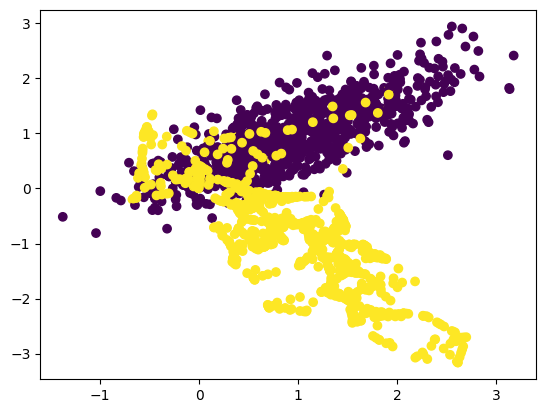

In [53]:
plt.scatter(X_over['feature1'],X_over['feature2'],c=y_over)
plt.show()

In [51]:
df3=pd.DataFrame(X_over,columns=['feature1','feature2'])
df4=pd.DataFrame(y_over,columns=['target'])
oversample_df=pd.concat([df3,df4],axis=1)
oversample_df

,feature1,feature2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.131956,-0.829397,1
1784,2.016432,-2.297423,1
1785,1.792277,-2.302248,1
1786,2.385647,-2.739840,1


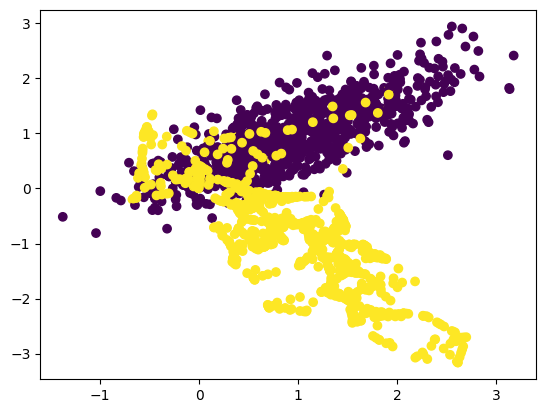

In [52]:
plt.scatter(oversample_df['feature1'],oversample_df['feature2'],c=oversample_df['target'])
plt.show()